# **Background & Context**
Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.


## **Task**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### **Dataset:**
The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone







In [80]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# Download Stopwords.
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets.csv')

In [46]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [47]:
# print shape of data.
data.shape

(14640, 15)

In [48]:
#information of all columns in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [49]:
data.isnull().sum(axis=0)

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


# Exploratory Data Analysis

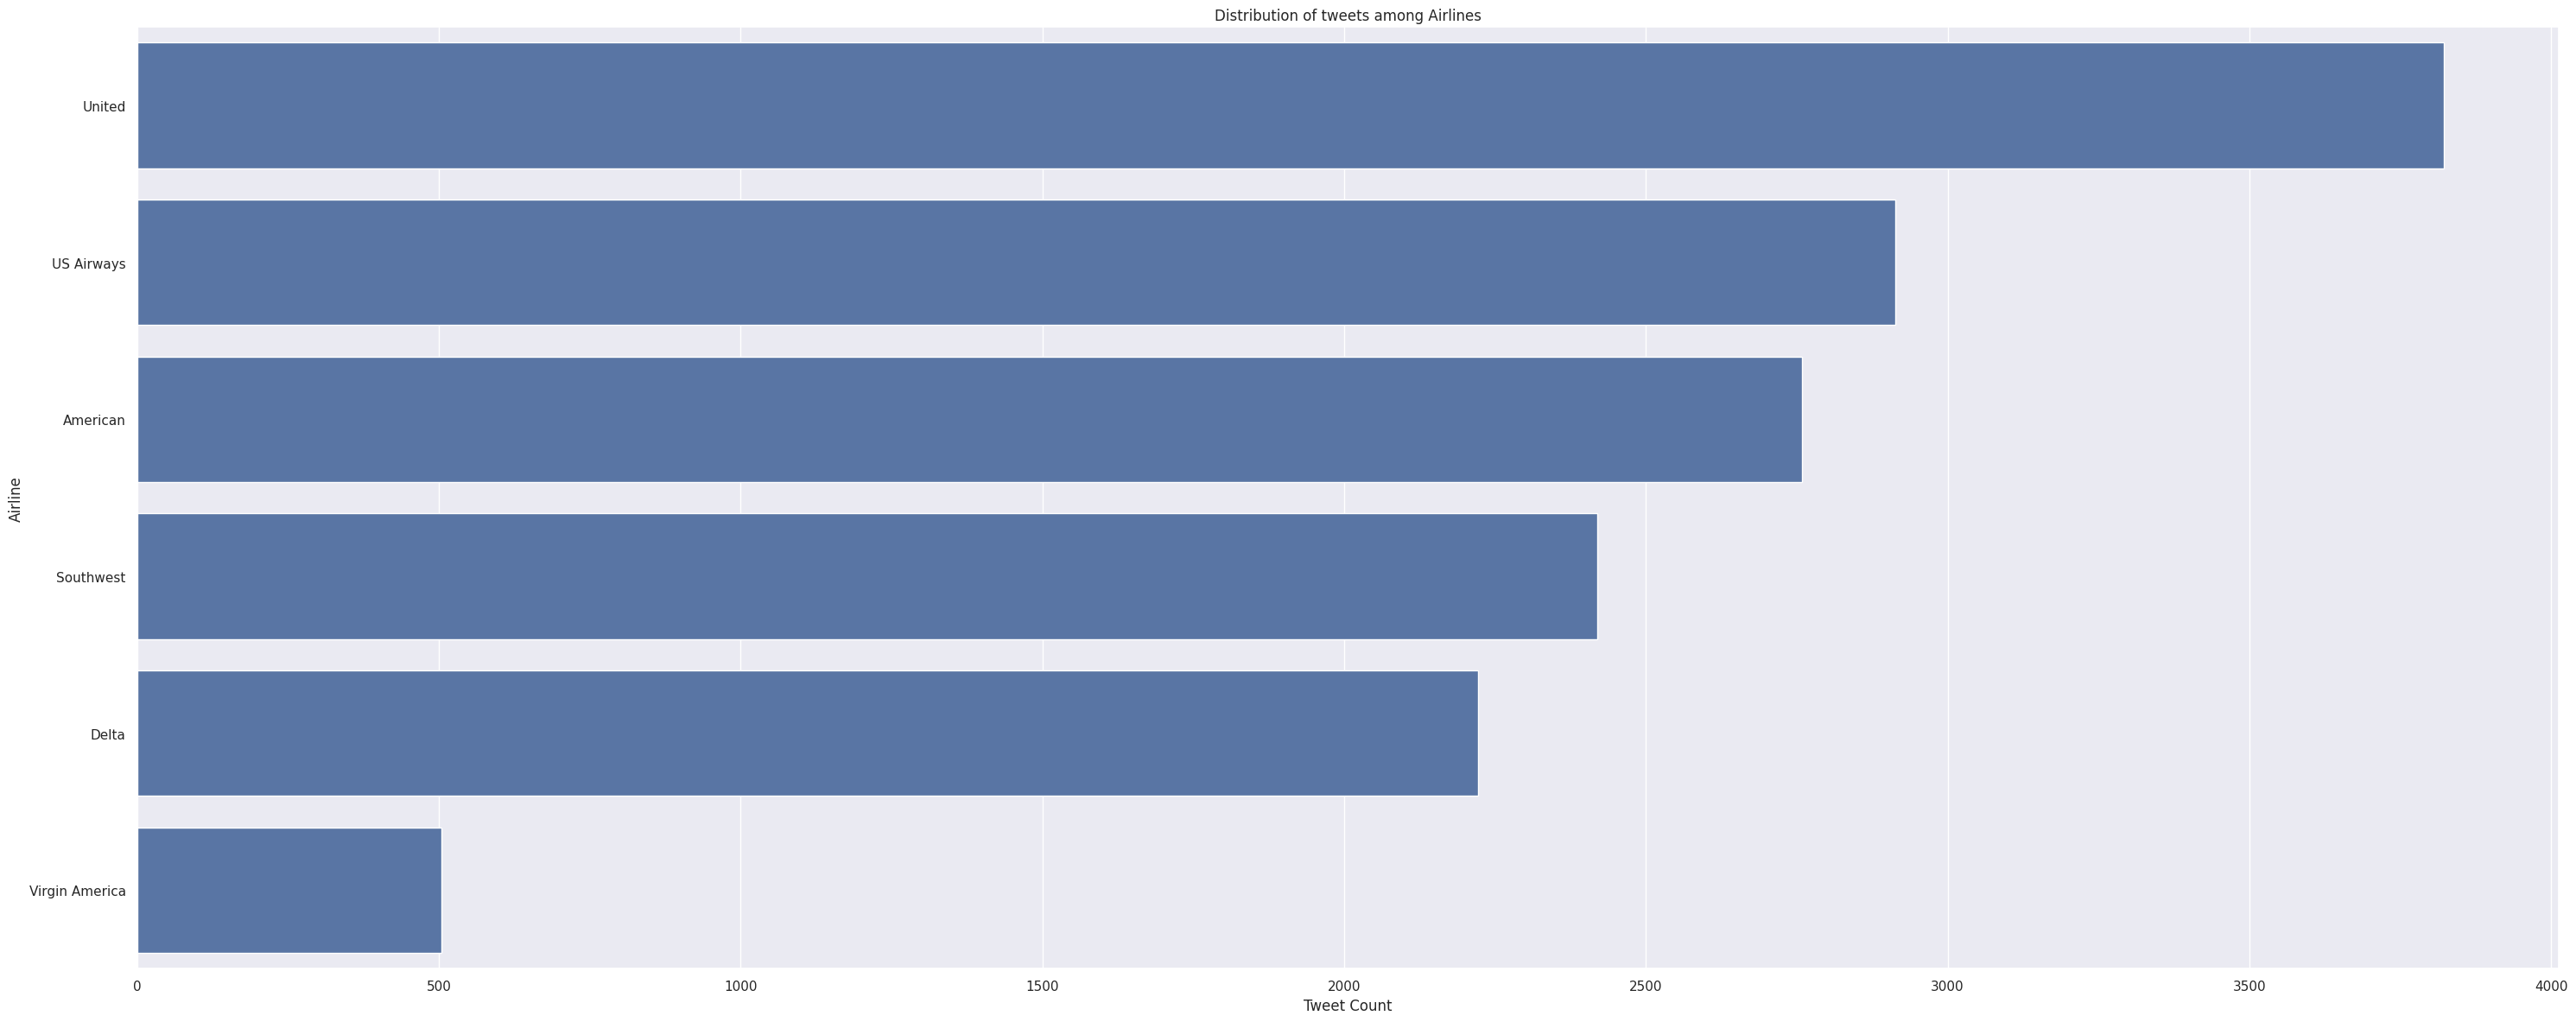

In [50]:
# # Finding the count of tweets about each airline
dt = data['airline'].value_counts().reset_index()  # get the counts of tweets over all airlines
dt.columns = ['airline', 'count']  #Create a matrix of the count of tweets over each airline

#get the count of tweets from every place
ds = dt.groupby(['airline']).sum().sort_values(by='count', ascending=False).reset_index()
ds = ds[ds["airline"]!="other"]

# get the plot with no of twwets contains x number of tags
dt = ds

fig = sns.barplot(
    x=dt["count"],
    y=dt["airline"],
    orient='h'
)

plt.title('Distribution of tweets among Airlines')
plt.xlabel('Tweet Count')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

- United airlines has the most tweets,  about 3800
- Virgin America has much less at about 500

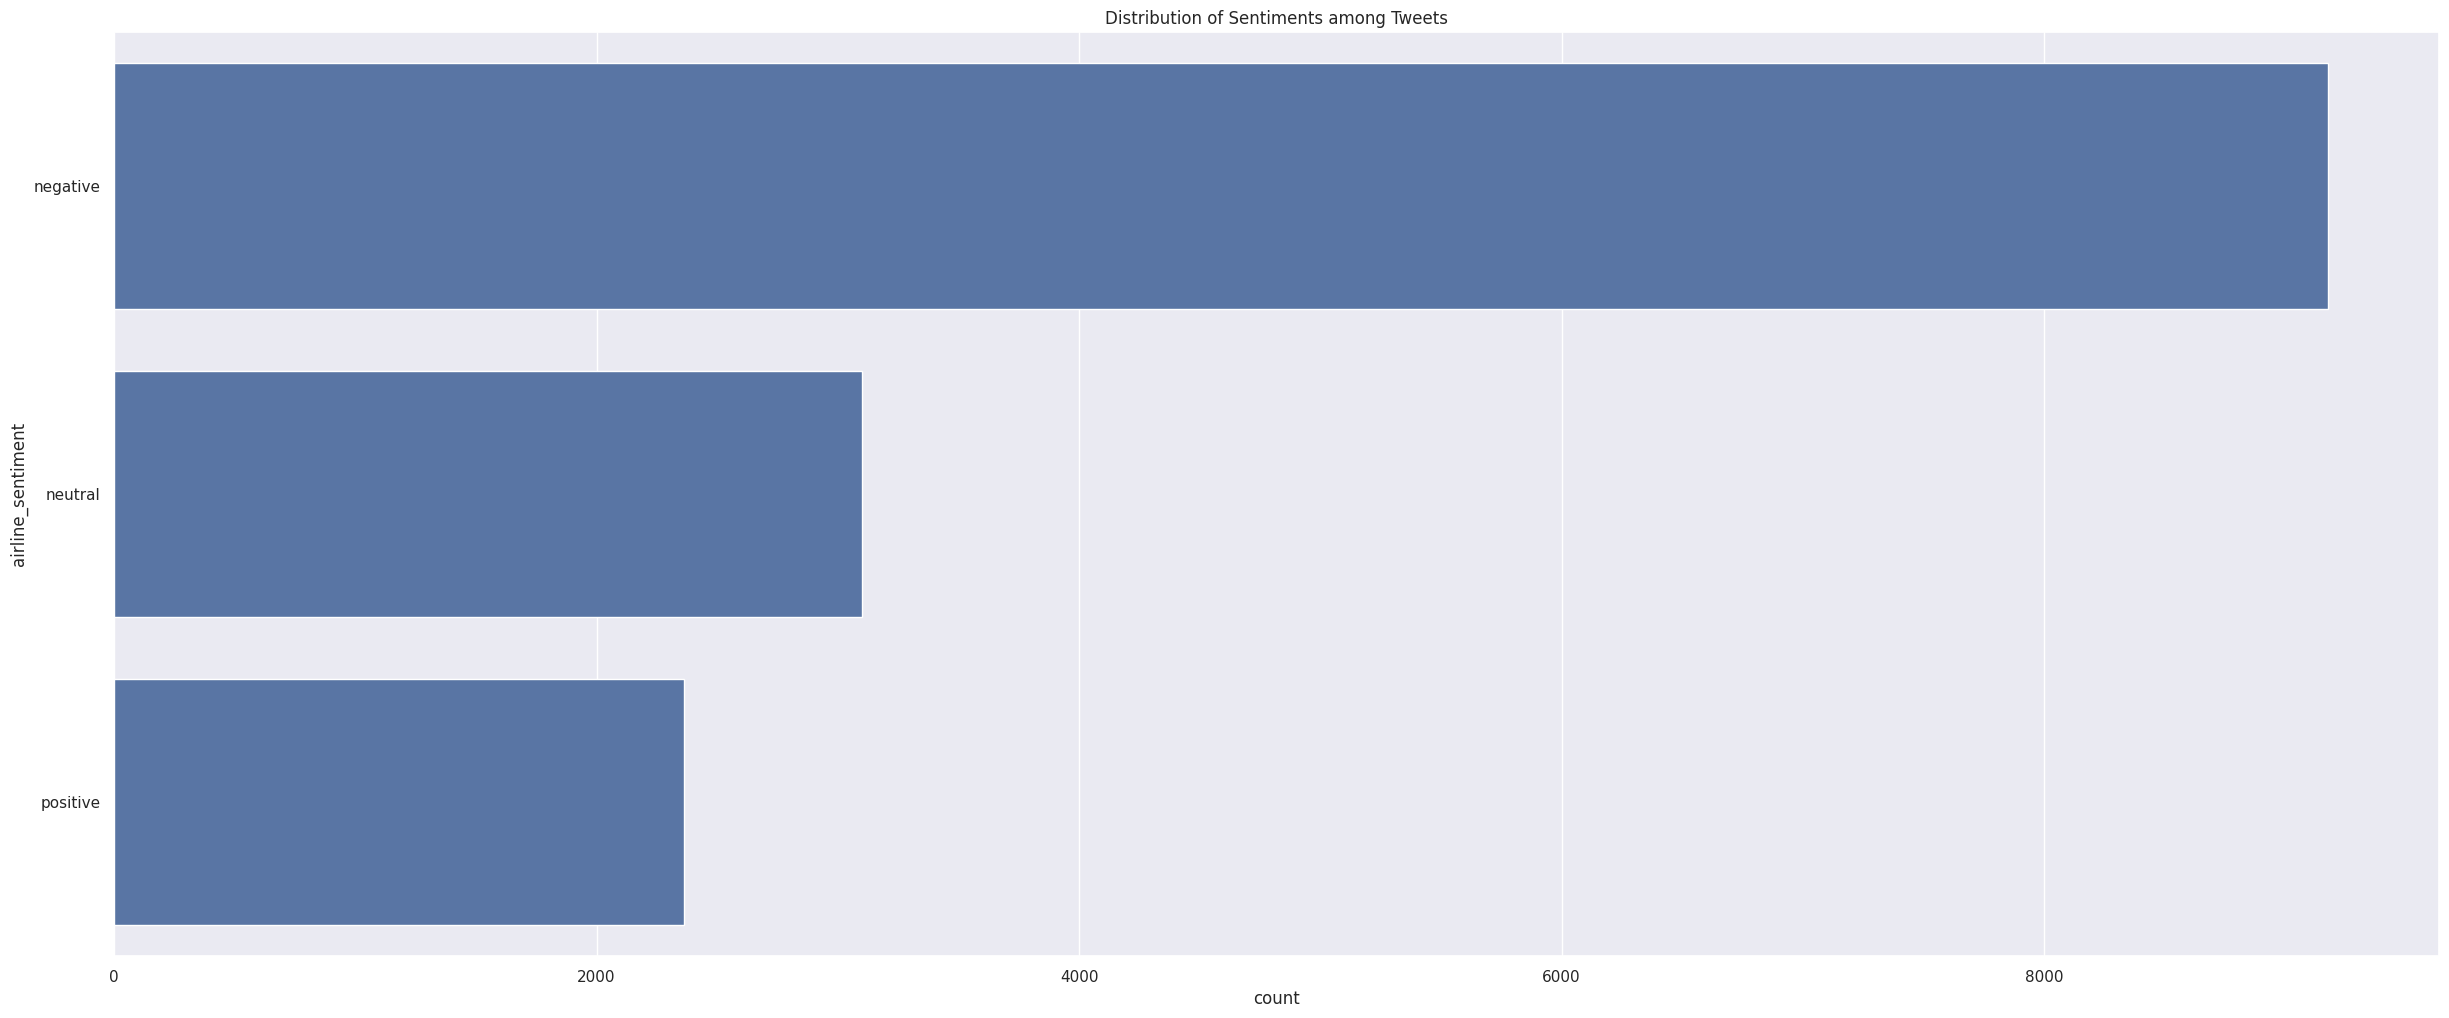

In [51]:
# Finding the count of each sentiment category
dt1 = data['airline_sentiment'].value_counts().reset_index()  # get the counts of airline_sentiments over all tweets
dt1.columns = ['airline_sentiment', 'count'] #Create a matrix of the count over each sentiment

#get the count of sentiments from every tweet
ds1 = dt1.groupby(['airline_sentiment']).sum().sort_values(by='count', ascending=False).reset_index()
ds1 = ds1[ds1["airline_sentiment"]!="other"]

# get the plot with no of sentiments contains x number of tweets
dt1 = ds1

fig = sns.barplot(
    x
    =dt1["count"],
    y=dt1["airline_sentiment"],
    orient='h'
).set_title('Distribution of Sentiments among Tweets')

- The negative tweets far outweigh the amount of neutral & positive tweets

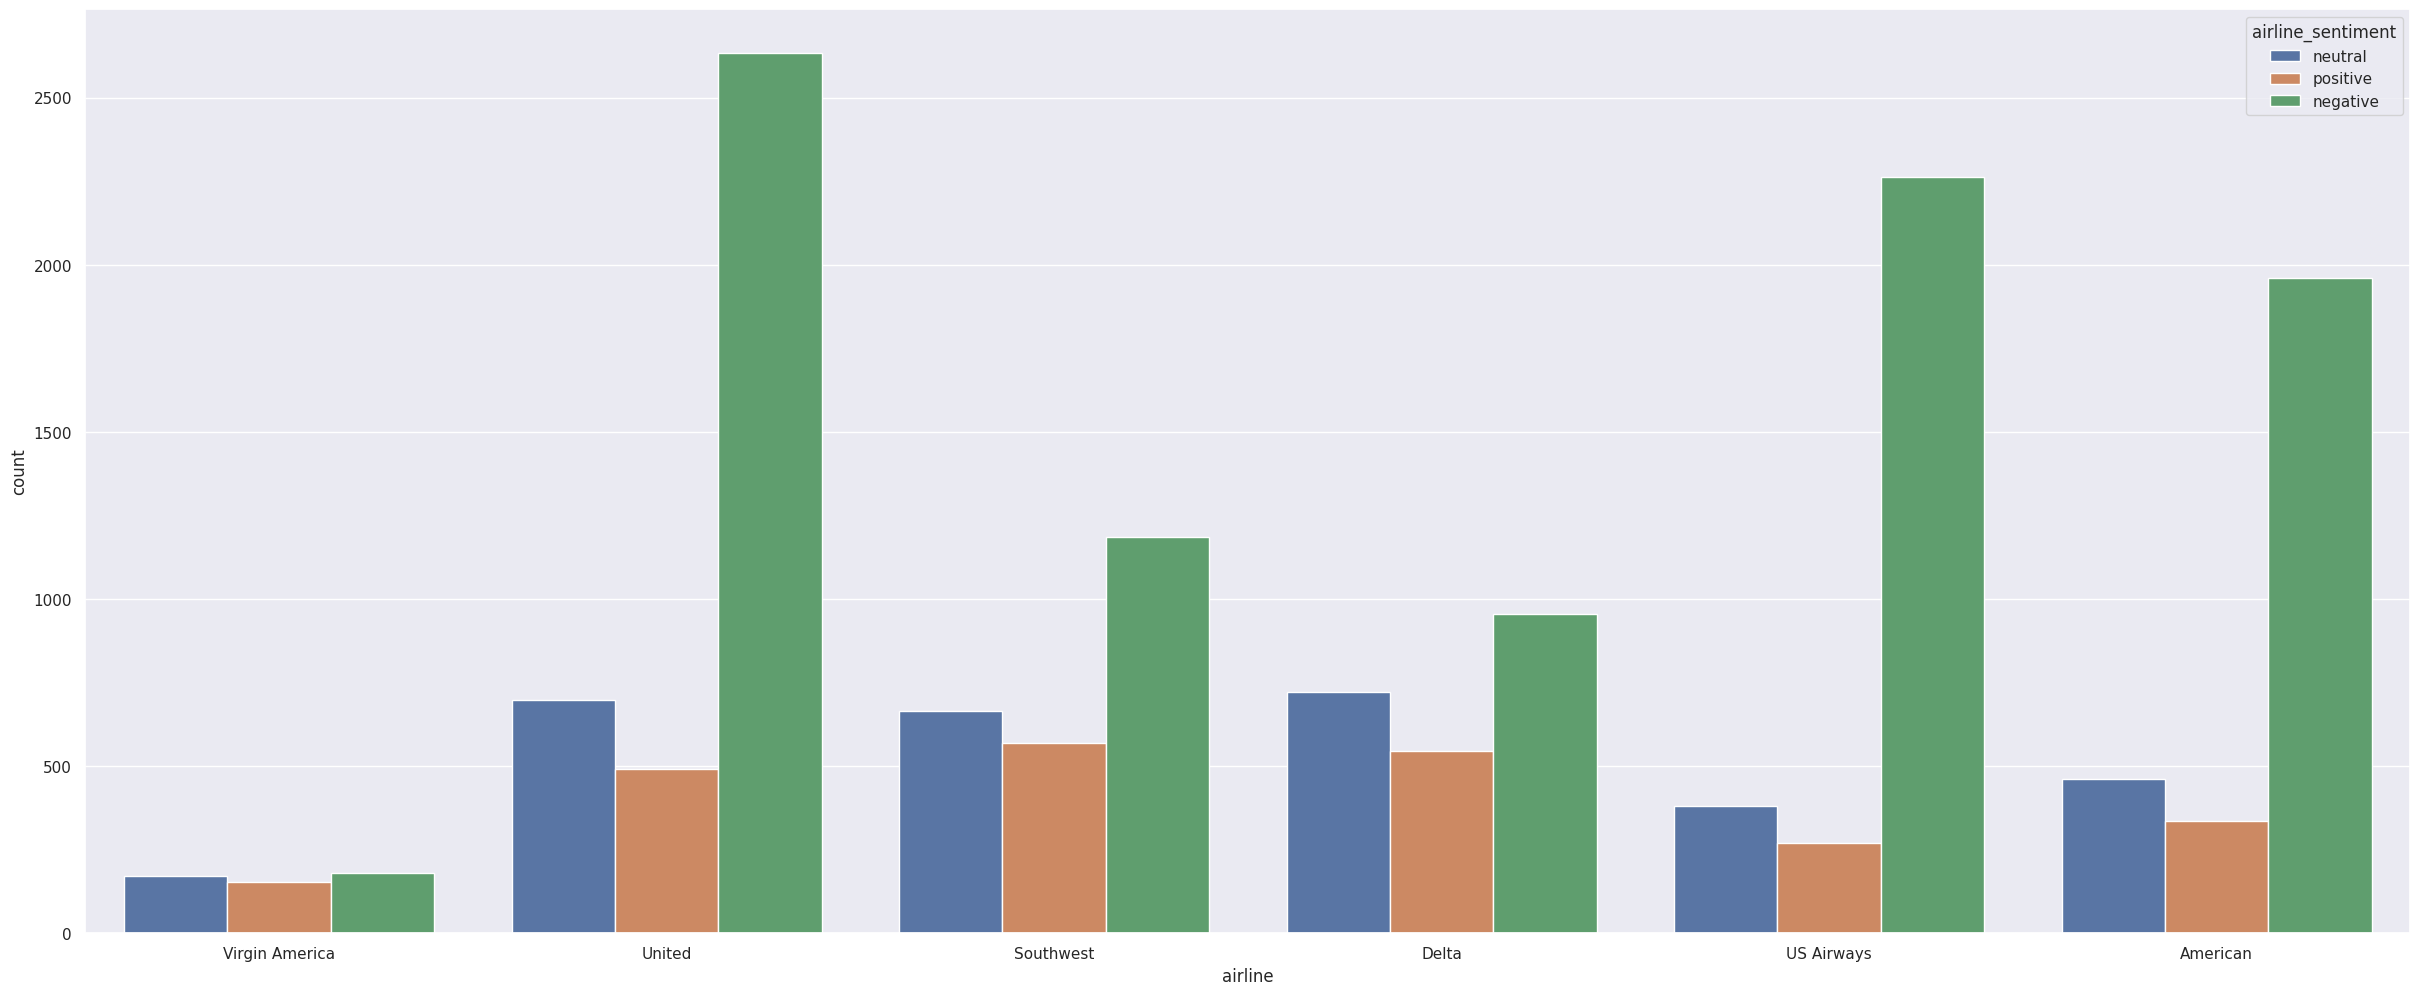

In [52]:
#Plotting the sentiments for all airlines
sns.countplot(data=data, x='airline', hue="airline_sentiment")
sns.set(rc={'figure.figsize':(12,12)})

- Besides Virgin America, Each airlines tweets are mainly negative with the second most reoccuring being neutral tweets
- Virgin America has about an even number of negative and neutral tweets
- All airlines recieve positive tweets the least in comparison

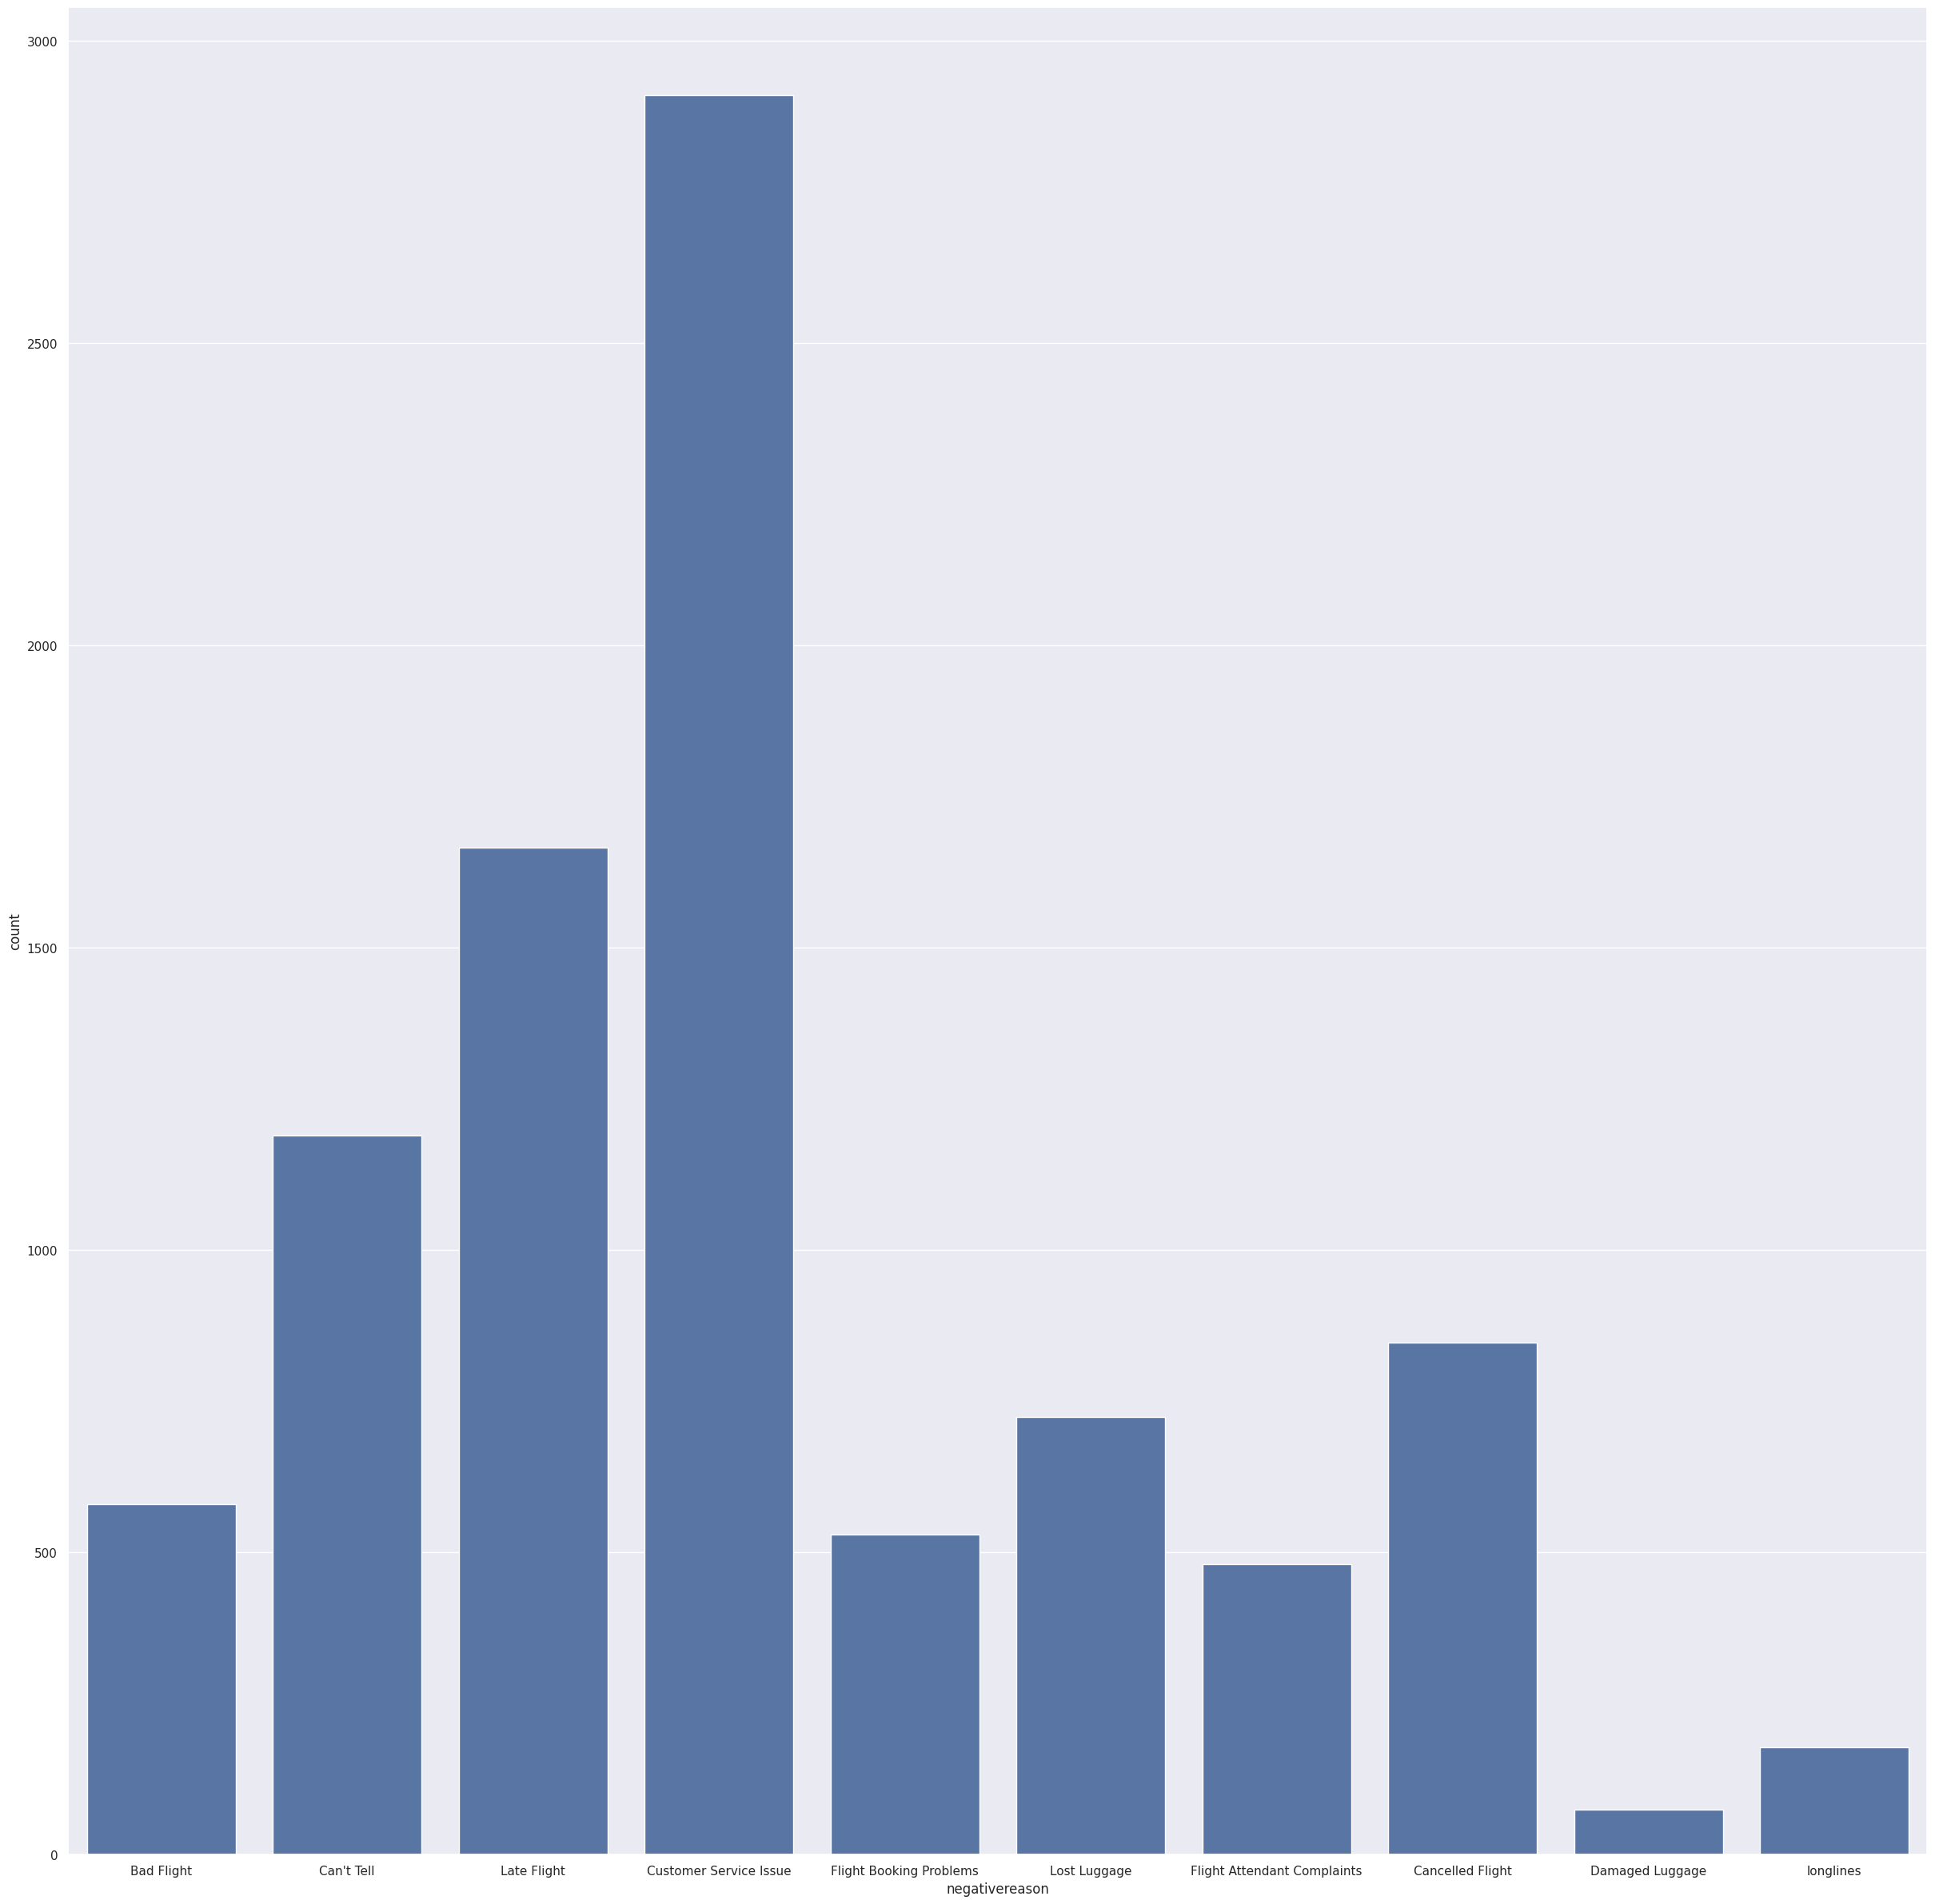

In [56]:
sns.countplot(data=data,x='negativereason')
sns.set(rc={'figure.figsize':(12,12)})

- A very large amount of negative tweets came from Customer Service issues and Late Flight issues

## Word Cloud for Negative Tweets

In [57]:
from wordcloud import WordCloud,STOPWORDS

In [58]:
negative_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [59]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

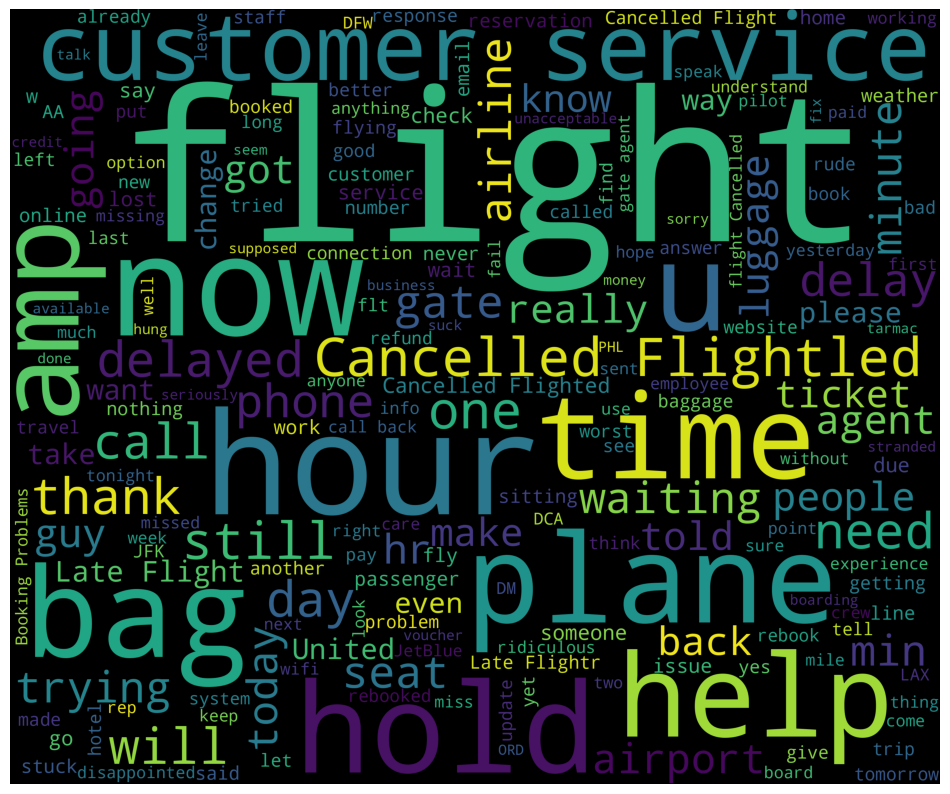

In [60]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- flight, plane, bag, time, hour, hold, now, amp are some of the most commonly occuring negative words

## Word Cloud for Positive Tweets

In [61]:
negative_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [62]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

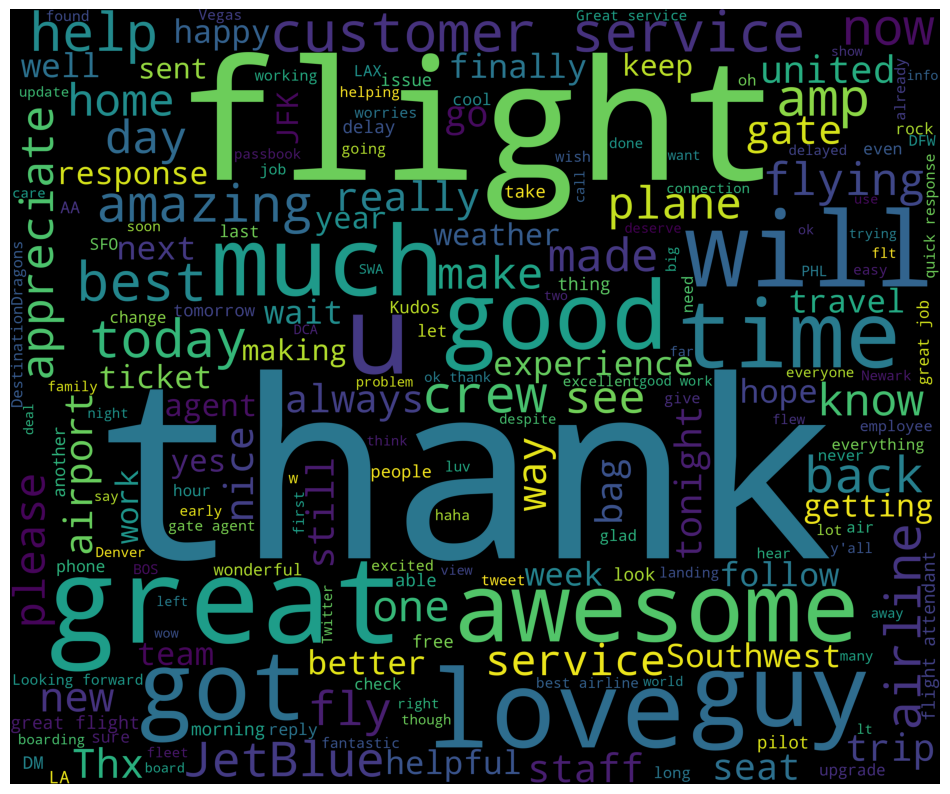

In [63]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- thank, flight, great, much, love, guy, will, awesome are some of the most commonly occuring positive words

##Understanding our data columns

In [64]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [65]:
#removing all columns except for text and airline_sentiment
data = data[["text","airline_sentiment"]]
data.shape

(14640, 2)

In [66]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#Data Pre-Processing

In [67]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#### HTML Tag Removal

In [68]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#### Removing Numbers

In [69]:
#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text
data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#### Special Character & Punctuation Removal

In [70]:
#Remove Special Characters
def remove_special_characters(text,remove_digits=False):
  pattern=r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
  text=re.sub(pattern, '',text)
  return text
data['text'] = data['text'].apply(lambda x: remove_special_characters(x))
data.head()

,text,airline_sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus youve added commercials to the experience tacky,positive
2,VirginAmerica I didnt today Must mean I need to take another trip,neutral
3,VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,negative
4,VirginAmerica and its a really big bad thing about it,negative


### Tokenization

In [81]:
# Tokenization of data
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, youve, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, didnt, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, its, a, really, big, bad, thing, about, it]",negative


#### LowerCase Conversion

In [82]:
# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, youve, added, commercials, to, the, experience, tacky]",positive
2,"[virginamerica, i, didnt, today, must, mean, i, need, to, take, another, trip]",neutral
3,"[virginamerica, its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[virginamerica, and, its, a, really, big, bad, thing, about, it]",negative


#### Stopword Removal

In [83]:
import nltk
nltk.download('stopwords')

#using the english stopwords
stopwords = stopwords.words('english')
stopwords = list(set(stopwords))

#removing no & not from the stopwords so that we dont lose any negative context
stopwords.remove('not')
stopwords.remove('no')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [84]:
# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return ' '.join(new_words)
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus youve added commercials experience tacky,positive
2,virginamerica didnt today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests faces little recourse,negative
4,virginamerica really big bad thing,negative


#### Stemming

In [85]:

def simple_stemmer(text):
  stemmer=nltk.porter.PorterStemmer()
  text=' '.join([stemmer.stem(word) for word in text.split()])
  return text
data['text'] = data['text'].apply(lambda x: simple_stemmer(x))
data.head()

,text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plu youv ad commerci experi tacki,positive
2,virginamerica didnt today must mean need take anoth trip,neutral
3,virginamerica realli aggress blast obnoxi entertain guest face littl recours,negative
4,virginamerica realli big bad thing,negative


#Vectorization

## Count Vectorizer

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer(max_features=2000)
# tokenize and build vocab
vectorizer.fit(data['text'])
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(data['text'])
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'virginamerica': np.int64(1877), 'said': np.int64(1512), 'plu': np.int64(1327), 'youv': np.int64(1993), 'ad': np.int64(25), 'commerci': np.int64(349), 'experi': np.int64(622), 'didnt': np.int64(492), 'today': np.int64(1771), 'must': np.int64(1159), 'mean': np.int64(1095), 'need': np.int64(1171), 'take': np.int64(1717), 'anoth': np.int64(82), 'trip': np.int64(1798), 'realli': np.int64(1417), 'entertain': np.int64(583), 'guest': np.int64(798), 'face': np.int64(638), 'littl': np.int64(1029), 'big': np.int64(195), 'bad': np.int64(153), 'thing': np.int64(1747), 'serious': np.int64(1551), 'would': np.int64(1963), 'pay': np.int64(1278), 'flight': np.int64(695), 'seat': np.int64(1533), 'play': np.int64(1323), 'fli': np.int64(693), 'va': np.int64(1865), 'ye': np.int64(1979), 'nearli': np.int64(1170), 'everi': np.int64(601), 'time': np.int64(1766), 'vx': np.int64(1886), 'wont': np.int64(1951), 'go': np.int64(776), 'away': np.int64(146), 'miss': np.int64(1136), 'opportun': np.int64(1233), 'witho

## Tf-Idf Vectorizer

In [87]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(max_features=2000)
vector2 = vectorizer2.fit_transform(data['text'])

vector2 = vector2.toarray()
print(vector2.shape)
print(vector2)

(14640, 2000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Building Model with Count Vectorizer

In [88]:
labels = data['airline_sentiment']

In [89]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vector, labels, test_size=0.3, random_state=42)

In [90]:
# Using Random Forest to build model for the classification of tweets.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, vector, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7167349726775954


In [91]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [92]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

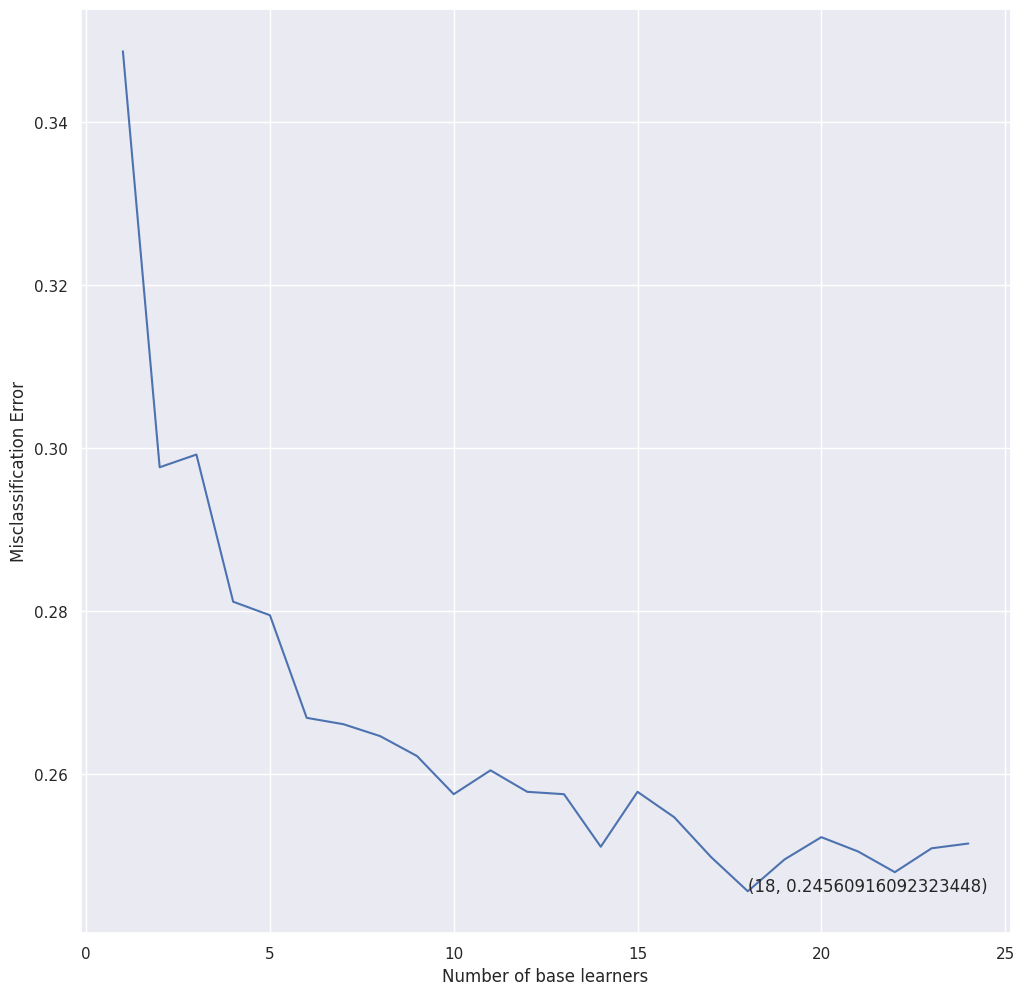

In [93]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

- As K increases our error decreases

In [94]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7711748633879781

- The accuracy of the model is at 77% which is slightly above our target of 75%

In [95]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2530  215   69]
 [ 358  448   78]
 [ 172  113  409]]
0.7711748633879781


<Axes: >

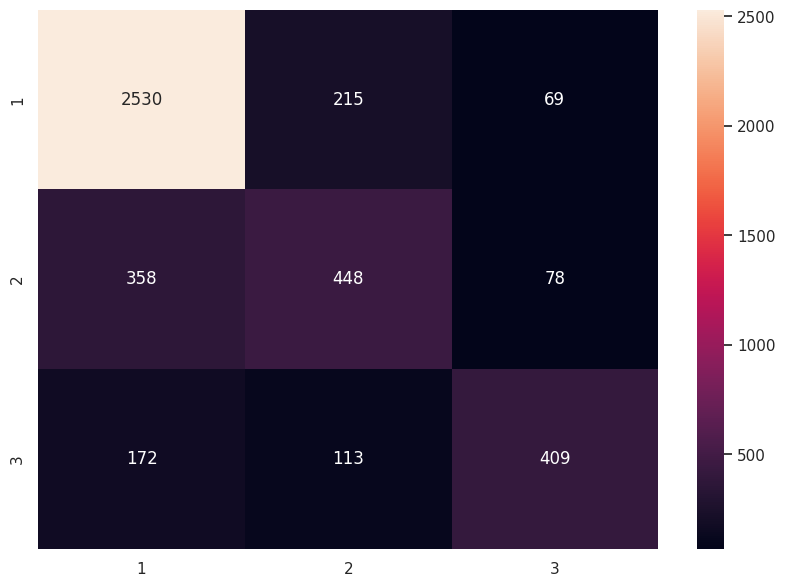

In [96]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- 1: negative
 - 82% of negative tweets are correctly identified
- 2: neutral
  - 65% of neutral tweets are correctly identified
- 3: positive
  - 70% of positive tweets are correctly identified

In [97]:
all_features = vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '



from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

-These are some of our top most reoccuring features

# Building Model with Tf-Idf Vectorizer

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, vector2, labels, cv=5)))

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vector2, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of tweets.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, vector2, labels, cv=5)))

In [ ]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

- As K increases our error decreases

In [ ]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

- The accuracy of the model is at 77% which is slightly above our target of 75%

In [ ]:
result = clf.predict(X_test)

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- 1: negative
 - 80% of negative tweets are correctly identified
- 2: neutral
  - 62% of neutral tweets are correctly identified
- 3: positive
  - 75% of positive tweets are correctly identified

In [ ]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '


from wordcloud import WordCloud
wordcloud = WordCloud(background_color="White",width=2000,
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

-These are some of our top most reoccuring features

## Model Comparison

- CountVector RandomForest:
  - 77% overrall accuracy
  - 82% of negative tweets are correctly identified
  - 65% of neutral tweets are correctly identified
  - 70% of positive tweets are correctly identified
  

- Tf-Idf Vectorizer:
  - 77% overrall accuracy
  - 80% of negative tweets are correctly identified
  - 62% of neutral tweets are correctly identified
  - 75% of positive tweets are correctly identified

# Conclusion

- After analysing the data and deriving the target columns, two machine learning models were created
- I created both a model based on a Count Vetorizer and a model based on a Tf-Idf Vectorizer

### Take-Away:
- In my opinion, even though the accuracy of the models was very similar, airlines should utilize the CountVector Model. It is more important for the airlines to identify negative and neutral tweets as this will guide them to the areas they need to improve. The CountVector Model gets 82% and 65% accuracy on negative and neutral tweets, while the Tf-idf Vector model gets 80% and 62%